# Plot the maps for the whole array and the subarrays

In [56]:
# Importing modules
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from utils_basic import *
from os.path import join

In [57]:
# Inputs
rootdir = ROOTDIR

eastmin_whole = EASTMIN_WHOLE
eastmax_whole = EASTMAX_WHOLE
northmin_whole = NORTHMIN_WHOLE
northmax_whole = NORTHMAX_WHOLE

eastmin_a = EASTMIN_A
eastmax_a = EASTMAX_A
northmin_a = NORTHMIN_A
northmax_a = NORTHMAX_A

eastmin_b = EASTMIN_B
eastmax_b = EASTMAX_B
northmin_b = NORTHMIN_B
northmax_b = NORTHMAX_B

stations_highlight = ["A01", "A04", "A08", "A11", "A15", "A19", "B01", "B04", "B08", "B11", "B19", "B20"]

size_station_whole = 60
size_station_a = 80
size_station_b = 80

size_borehole_whole = 60
size_borehole_a = 80
size_borehole_b = 80

scale_whole = 20
scale_a = 10
scale_b = 12

edgewidth_normal = 0.5
edgewidth_highlight = 1.5


In [58]:
# Read the station and borehole coordinates
inpath = join(rootdir, "stations.csv")
stadf = pd.read_csv(inpath, index_col=0)

inpath = join(rootdir, "boreholes.csv")
bordf = pd.read_csv(inpath, index_col=0)


Figure saved to /Volumes/OmanData/data/station_map_w_subarray_boxes.png


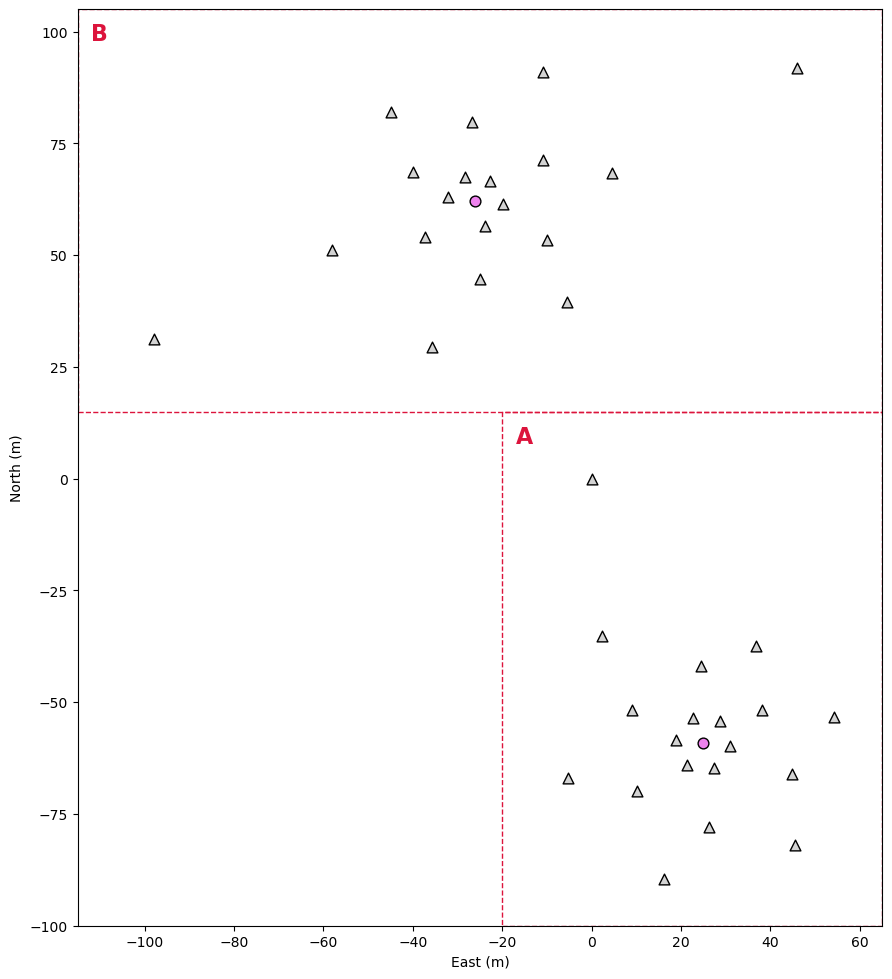

In [59]:
# Plot the whole array
fig = plt.figure(figsize=((eastmax_whole-eastmin_whole)/scale_whole, (northmax_whole-northmin_whole)/scale_whole))
ax = fig.add_subplot(111)

for i, row in stadf.iterrows():
    name = row["name"]
    # if name in INNER_STATIONS:
    #     ax.scatter(row["east"], row["north"], marker="^", color="black", edgecolors="black", s=size_station_whole)
    # else:
    #     ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_whole)
    ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_whole)

    # if name in stations_highlight:
    #     ax.annotate(name, xy=(row["east"], row["north"]), xytext=(row["east"]+5, row["north"]+5), fontsize=10, ha="left", va="bottom")

for i, row in bordf.iterrows():
    ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_whole)

ax.text(eastmin_a+3, northmax_a-3, "A", ha="left", va="top", fontsize=16, fontweight="bold", color="crimson")
ax.text(eastmin_b+3, northmax_b-3, "B", ha="left", va="top", fontsize=16, fontweight="bold", color="crimson")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_whole, eastmax_whole)
ax.set_ylim(northmin_whole, northmax_whole)
ax.set_aspect("equal")


# Create the rectangle patch
rect1 = Rectangle((eastmin_a, northmin_a), eastmax_a - eastmin_a, northmax_a - northmin_a, 
                    linewidth=1, edgecolor='crimson', facecolor='none', linestyle='dashed')

rect2 = Rectangle((eastmin_b, northmin_b), eastmax_b - eastmin_b, northmax_b - northmin_b,
                    linewidth=1, edgecolor='crimson', facecolor='none', linestyle='dashed')

# Add the rectangle patch to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)

## Save the figure
fig.tight_layout()
filename = f"station_map_w_subarray_boxes.png"

save_figure(fig, filename)

Figure saved to /Volumes/OmanData/data/station_map_A.png


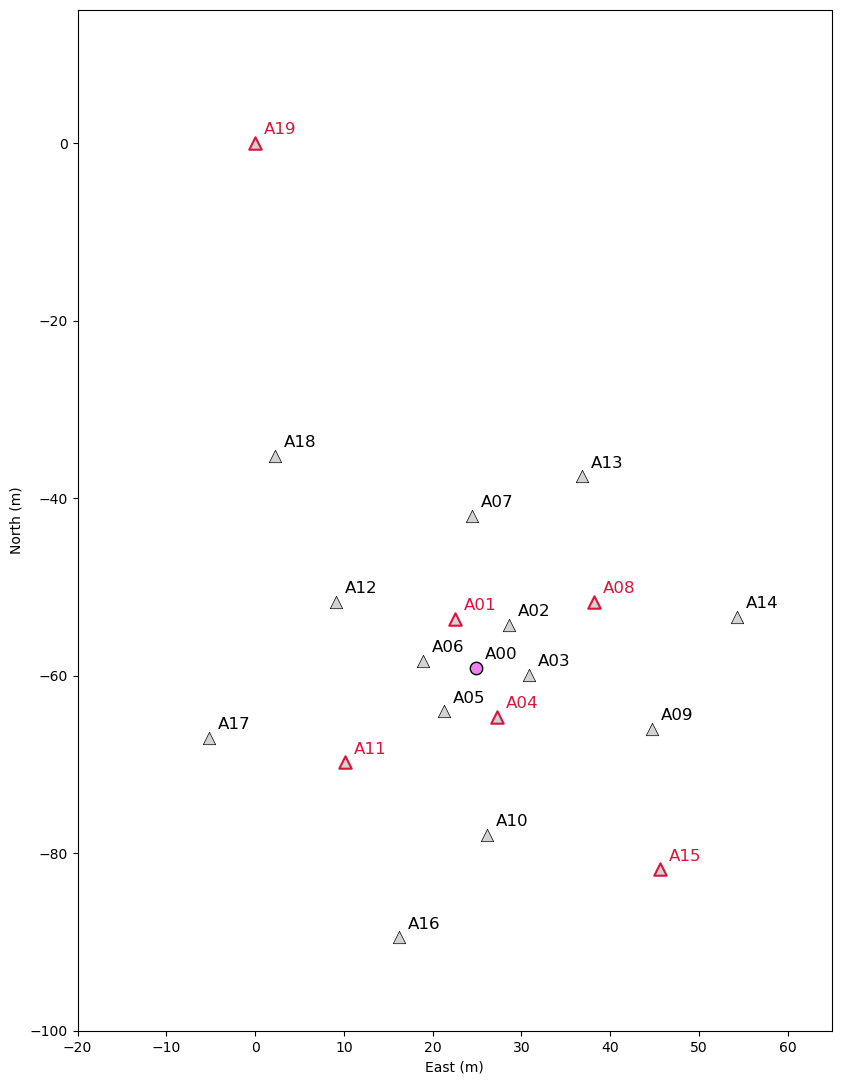

In [60]:
# Plot Subarray A
fig = plt.figure(figsize=((eastmax_a-eastmin_a)/scale_a, (northmax_a-northmin_a)/scale_a))
ax = fig.add_subplot(111)

stadf_a = stadf[stadf["subarray"] == "A"]

for i, row in stadf_a.iterrows():
    if row["name"] in stations_highlight:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="crimson", s=size_station_a, linewidth=edgewidth_highlight)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="crimson")
    else:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_a, linewidth=edgewidth_normal)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="black")
        

for i, row in bordf.iterrows():
    if row["name"] == "A00":
        ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_a)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="k")

ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_a, eastmax_a)
ax.set_ylim(northmin_a, northmax_a)
ax.set_aspect("equal")

## Save the figure
fig.tight_layout()
filename = f"station_map_A.png"

save_figure(fig, filename)

Figure saved to /Volumes/OmanData/data/station_map_B.png


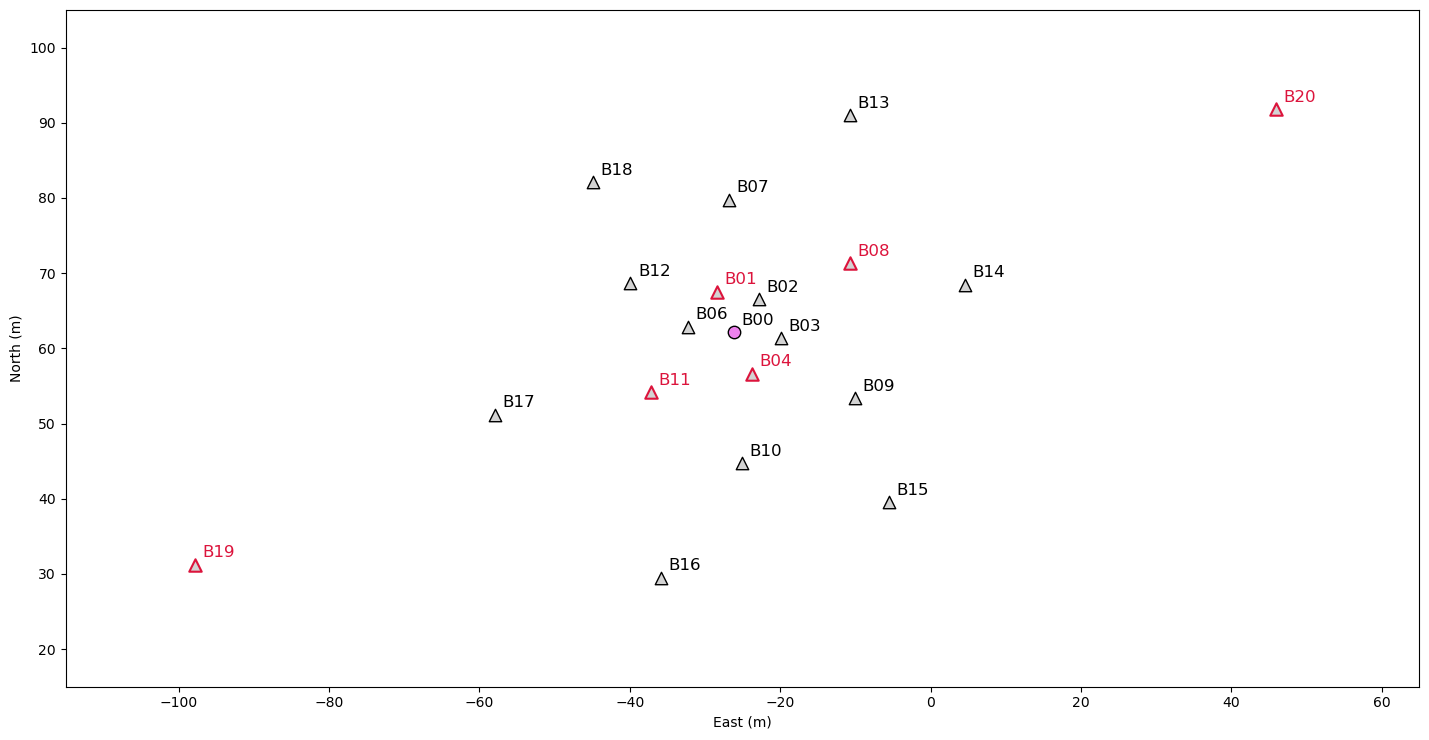

In [63]:
## Plot Subarray B
fig = plt.figure(figsize=((eastmax_b-eastmin_b)/scale_a, (northmax_b-northmin_b)/scale_b))
ax = fig.add_subplot(111)

stadf_b = stadf[stadf["subarray"] == "B"]

for i, row in stadf_b.iterrows():
    if row["name"] in stations_highlight:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="crimson", s=size_station_b, linewidth=edgewidth_highlight)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="crimson")
    else:
        ax.scatter(row["east"], row["north"], marker="^", color="lightgray", edgecolors="black", s=size_station_b)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="black")

for i, row in bordf.iterrows():
    if row["name"] == "B00":
        ax.scatter(row["east"], row["north"], marker="o", color="violet", edgecolors="black", s=size_borehole_b)
        ax.annotate(row["name"], (row["east"]+1, row["north"]+1), fontsize=12, color="k")
    
ax.set_xlabel("East (m)")
ax.set_ylabel("North (m)")
ax.set_xlim(eastmin_b, eastmax_b)
ax.set_ylim(northmin_b, northmax_b)
ax.set_aspect("equal")

## Save the figure
fig.tight_layout()
filename = f"station_map_B.png"

outpath = join(rootdir, filename)
fig.savefig(outpath, dpi=300, transparent=True)

save_figure(fig, filename)